# Trabajo de investigación

**Indicaciones** Todo debe ser desarrollado en este mismo Notebook. Haciendo uso de las celdas de Python y Markdown.

### Parte 1
1. Descargar el archivo en formato csv disponible en el blackboard llamado carga_ganadera.csv
2. El objetivo con este dataset es realizar las siguientes tareas:
   - Limpieza de datos
   - Tratamiento de datos
   - Generación de un modelo de Regresión y Clasificación
   - Visualización de datos
   - Evaluación de métricas por
3. La última sección consiste en desarrollar analizar métricas de clasificación 

### Parte 2
Revisar el índide Latinoamericano de Inteligencia Artificial https://indicelatam.cl/. También disponible en PDF en el blackboard.
Responder a las siguientes preguntas:
1. ¿Cuál es el objetivo principal del Índice Latinoamericano de IA y cómo se mide el progreso en la región?
2. ¿Qué países de Latinoamérica lideran actualmente el ranking del Índice Latinoamericano de IA y por qué?
3. ¿Cuáles son los principales desafíos que enfrenta la región para avanzar en la adopción y desarrollo de la Inteligencia Artificial?
4. ¿De qué manera el Índice Latinoamericano de IA considera la ética y la responsabilidad social en el desarrollo de la IA?
5. ¿Qué iniciativas gubernamentales y privadas están impulsando el desarrollo de la IA en Latinoamérica y cómo se reflejan en el Índice Latinoamericano de IA? 
6. De acuerdo al índice latinoamericano de IA ¿Cuál es el potencial del desarrollo de la inteligencia artificial en el Perú? 
7. ¿Qué iniciativas puede tomar en el Perú para ascender en el índice latinoamericano?


### Parte 3
A Brief History of Artificial Intelligence: What It Is, Where We Are, and Where We Are Going
Author: Michael Wooldridge

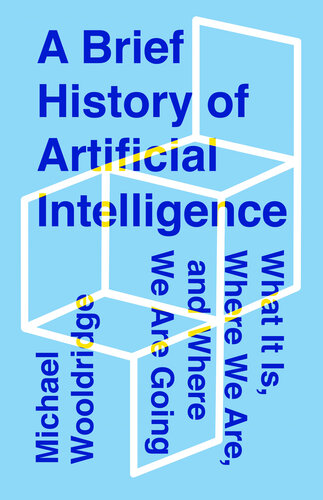

**Distribución de temas**

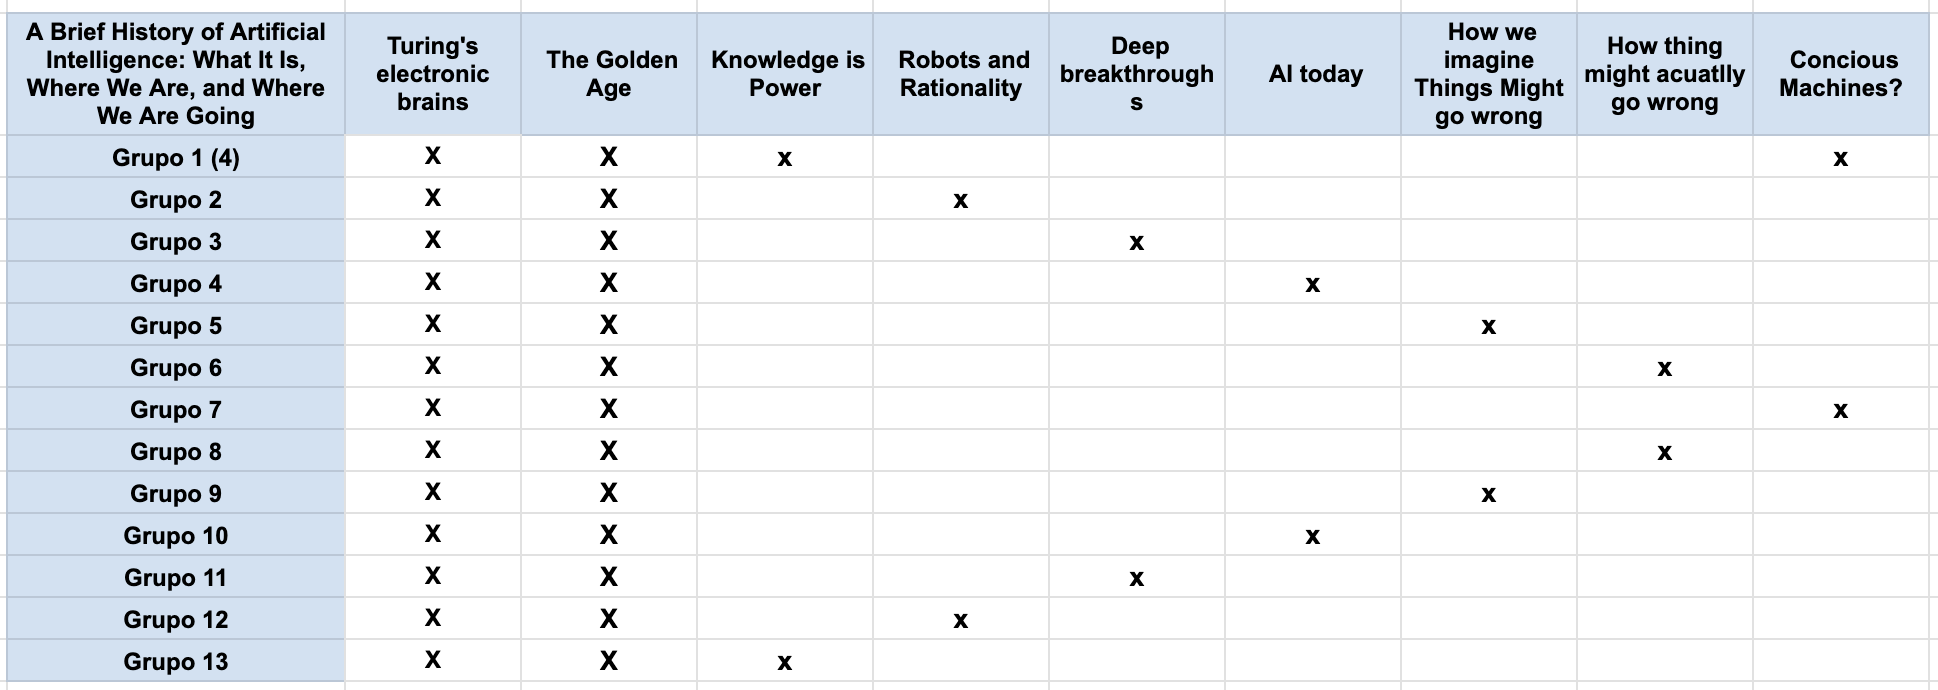

El objetivo es extraer 4 oraciones clave y 3 ideas (del grupo) sobre el capítulo.

### Rúbrica
| **Parte** | **Calificación** |
|-----------|--------------|
| Parte 1.1 | 6 pts |
| Parte 1.2 | 5 pts |
| Parte 2 | 4 pts |
| Parte 3 | 5 pts|

----
## Desarrollo

## Parte 1: Desarrollo de redes neuronales
Objetivos: 
1. Identificar columnas numéricas y columnas categóricas.
2. Diseñar una red de neuronas para resolver un problema de **regresión**.
3. Utilizar métricas para evaluar el modelo generado.

### 1.1 Datos ganaderos de Catalunya
Se trabajará únicamente con las columnas: [CODI POSTAL EXPLOTACIO,SERVEI TERRITORIAL  EXPLOTACIÓ,PROVINCIA EXPLOTACIÓ,COMARCA EXPLOTACIÓ,MUNICIPI EXPLOTACIÓ,TIPUS EXPLOTACIÓ,ESPÈCIE, INTEGRADORA, NOM ADS,CLASSIFICACIÓ ZOOTÈCNICA,DATA CLASSIFICACIÓ ZOOTÈCNICA,SISTEMA PRODUCTIU,CRITERI DE SOSTENIBILITAT,CAPACITAT PRODUCTIVA,TOTAL CAP PONEDORES,TOTAL URM,TOTAL NITROGEN].

El modelo a generar debe trabajar con TOTAL_URM o TOTAL_NITROGEN como variable a predecir. A elección del grupo. 

In [1]:
import pandas as pd 

data = pd.read_csv('carga_ganadera.csv')

columnas = [
    'CODI POSTAL EXPLOTACIO', 'SERVEI TERRITORIAL  EXPLOTACIÓ', 'PROVINCIA EXPLOTACIÓ',
    'COMARCA EXPLOTACIÓ', 'MUNICIPI EXPLOTACIÓ', 'TIPUS EXPLOTACIÓ', 'ESPÈCIE', 
    'INTEGRADORA', 'NOM ADS', 'CLASSIFICACIÓ ZOOTÈCNICA', 'DATA CLASSIFICACIÓ ZOOTÈCNICA',
    'SISTEMA PRODUCTIU', 'CRITERI DE SOSTENIBILITAT', 'CAPACITAT PRODUCTIVA', 
    'TOTAL CAP PONEDORES', 'TOTAL URM', 'TOTAL NITROGEN'
]

data = data[columnas]

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26338 entries, 0 to 26337
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CODI POSTAL EXPLOTACIO          26331 non-null  float64
 1   SERVEI TERRITORIAL  EXPLOTACIÓ  26338 non-null  object 
 2   PROVINCIA EXPLOTACIÓ            26338 non-null  object 
 3   COMARCA EXPLOTACIÓ              26338 non-null  object 
 4   MUNICIPI EXPLOTACIÓ             26338 non-null  object 
 5   TIPUS EXPLOTACIÓ                26338 non-null  object 
 6   ESPÈCIE                         26338 non-null  object 
 7   INTEGRADORA                     5895 non-null   object 
 8   NOM ADS                         11422 non-null  object 
 9   CLASSIFICACIÓ ZOOTÈCNICA        19246 non-null  object 
 10  DATA CLASSIFICACIÓ ZOOTÈCNICA   19206 non-null  object 
 11  SISTEMA PRODUCTIU               26006 non-null  object 
 12  CRITERI DE SOSTENIBILITAT       

In [3]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['SERVEI TERRITORIAL  EXPLOTACIÓ', 'PROVINCIA EXPLOTACIÓ',
       'COMARCA EXPLOTACIÓ', 'MUNICIPI EXPLOTACIÓ', 'TIPUS EXPLOTACIÓ',
       'ESPÈCIE', 'INTEGRADORA', 'NOM ADS', 'CLASSIFICACIÓ ZOOTÈCNICA',
       'DATA CLASSIFICACIÓ ZOOTÈCNICA', 'SISTEMA PRODUCTIU',
       'CRITERI DE SOSTENIBILITAT', 'CAPACITAT PRODUCTIVA'],
      dtype='object')

**1.1.1 Conversión a One-Hot Encoding**
___

In [4]:
# 1.1.1 Convertir las columnas categóricas a one-hot encoding. (1 ptos)

from sklearn.preprocessing import OneHotEncoder

x_categorical = data[categorical_columns]
encoder = OneHotEncoder(handle_unknown='ignore')

x_encoded = encoder.fit_transform(x_categorical)

categorical_encoded_columns = [
    f'{col}_{cat}' for i, col in enumerate(x_categorical.columns) for cat in encoder.categories_[i]
]

x_encoded_df = pd.DataFrame(x_encoded.toarray(), columns=categorical_encoded_columns)
df = pd.concat([data.drop(columns=categorical_columns), x_encoded_df], axis=1)

df.head()

,CODI POSTAL EXPLOTACIO,TOTAL CAP PONEDORES,TOTAL URM,TOTAL NITROGEN,SERVEI TERRITORIAL EXPLOTACIÓ_Alt Pirineu,SERVEI TERRITORIAL EXPLOTACIÓ_Barcelona,SERVEI TERRITORIAL EXPLOTACIÓ_Catalunya Central,SERVEI TERRITORIAL EXPLOTACIÓ_Girona,SERVEI TERRITORIAL EXPLOTACIÓ_Lleida,SERVEI TERRITORIAL EXPLOTACIÓ_Tarragona,...,CRITERI DE SOSTENIBILITAT_Integrat,CRITERI DE SOSTENIBILITAT_nan,CAPACITAT PRODUCTIVA_Grup I,CAPACITAT PRODUCTIVA_Grup II,CAPACITAT PRODUCTIVA_Grup III,CAPACITAT PRODUCTIVA_Grup IV,CAPACITAT PRODUCTIVA_No professional,CAPACITAT PRODUCTIVA_Professional,CAPACITAT PRODUCTIVA_Reduida,CAPACITAT PRODUCTIVA_nan
0,25651.0,0,5.80,372.05,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25651.0,0,290.88,17574.00,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25651.0,0,4.00,255.20,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,25651.0,0,4.00,255.20,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,25651.0,0,197.02,11875.25,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(26338, 5402)

**1.1.2 Red Neuronal para TOTAL_URM  -  random_state=42**
___

Usamos esta sentencia de código para ver que columnas tenian NaN, lo cual no dejaba ejecutar la función de activación de sigmoid

``nan_columns = x_train.columns[x_train.isnull().any()]``  
``print('Columnas con NaN en x_train:', nan_columns)``

In [6]:
# 1.1.2 Construir una red de neuronas para identificar el `TOTAL_URM` o `TOTAL_NITROGEN`. (3.5 ptos) 
# Se evaluará el loss function utilizado en cada capa.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

target_variable = 'TOTAL URM'

x = df.drop(columns=[target_variable])
y = df[target_variable]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('NaN en x_train:', x_train.isnull().any().any())
print('NaN en x_test:', x_test.isnull().any().any())

# Manejar NaN - Imputación con la media
imputer = SimpleImputer(strategy='mean')
imputer.fit(x_train)

x_train_imputed = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns, index=x_train.index)
x_test_imputed = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns, index=x_test.index)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_test_scaled = scaler.transform(x_test_imputed)

print('NaN en x_train:', x_train_imputed.isnull().any().any())
print('NaN en x_test:', x_test_imputed.isnull().any().any())

model_relu = keras.models.Sequential()
model_relu.add(keras.layers.InputLayer(shape=[x_train_scaled.shape[1]])) 
model_relu.add(keras.layers.Dense(200, activation="relu"))
model_relu.add(keras.layers.Dense(100, activation="relu"))
model_relu.add(keras.layers.Dense(50, activation="relu"))
model_relu.add(keras.layers.Dense(20, activation="relu"))
model_relu.add(keras.layers.Dense(1, activation="linear"))

model_sigmoid = keras.models.Sequential()
model_sigmoid.add(keras.layers.InputLayer(shape=[x_train_scaled.shape[1]])) 
model_sigmoid.add(keras.layers.Dense(200, activation="sigmoid"))
model_sigmoid.add(keras.layers.Dense(100, activation="sigmoid"))
model_sigmoid.add(keras.layers.Dense(50, activation="sigmoid"))
model_sigmoid.add(keras.layers.Dense(20, activation="sigmoid"))
model_sigmoid.add(keras.layers.Dense(1, activation="linear"))

model_tanh = keras.models.Sequential()
model_tanh.add(keras.layers.InputLayer(shape=[x_train_scaled.shape[1]])) 
model_tanh.add(keras.layers.Dense(200, activation="tanh"))
model_tanh.add(keras.layers.Dense(100, activation="tanh"))
model_tanh.add(keras.layers.Dense(50, activation="tanh"))
model_tanh.add(keras.layers.Dense(20, activation="tanh"))
model_tanh.add(keras.layers.Dense(1, activation="linear"))

NaN en x_train: True
NaN en x_test: False
NaN en x_train: False
NaN en x_test: False


**1.1.3 Evaluación de desenvolvimiento del modelo - 50 épocas**
___

In [7]:
# Compilamos ambos modelos con métricas

model_relu.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

model_sigmoid.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

model_tanh.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

In [8]:
history_relu = model_relu.fit(
    x_train_scaled, y_train,
    validation_data=(x_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

history_sigmoid = model_sigmoid.fit(
    x_train_scaled, y_train,
    validation_data=(x_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

history_tanh = model_tanh.fit(
    x_train_scaled, y_train,
    validation_data=(x_test_scaled, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - loss: 13515.4531 - mean_absolute_error: 59.5008 - val_loss: 5146.7505 - val_mean_absolute_error: 43.8921
Epoch 2/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 4230.3164 - mean_absolute_error: 34.9804 - val_loss: 3837.6038 - val_mean_absolute_error: 34.7084
Epoch 3/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 2270.4146 - mean_absolute_error: 26.8689 - val_loss: 3251.6396 - val_mean_absolute_error: 31.4383
Epoch 4/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 1771.7328 - mean_absolute_error: 22.1071 - val_loss: 3360.4509 - val_mean_absolute_error: 31.2299
Epoch 5/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - loss: 1283.6461 - mean_absolute_error: 19.3296 - val_loss: 3444.3152 - val_mean_absolute_error: 31.3785
Epoch 6/50
659/659 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - loss: 1146.8843 - mean_absolute_error: 18.5891 - val_loss: 3329.7666 - val_mean_absolute_error: 30.9975
Epoch 7/50
659/659 ━━━━━━━━━━━━━━━━━━━━

In [9]:
model_relu.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │     1,080,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,319,775 (12.66 MB)

 Trainable params: 1,106,591 (4.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,213,184 (8.44 MB)

In [10]:
model_sigmoid.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 200)            │     1,080,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,319,775 (12.66 MB)

 Trainable params: 1,106,591 (4.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,213,184 (8.44 MB)

In [11]:
model_tanh.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 200)            │     1,080,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,319,775 (12.66 MB)

 Trainable params: 1,106,591 (4.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,213,184 (8.44 MB)

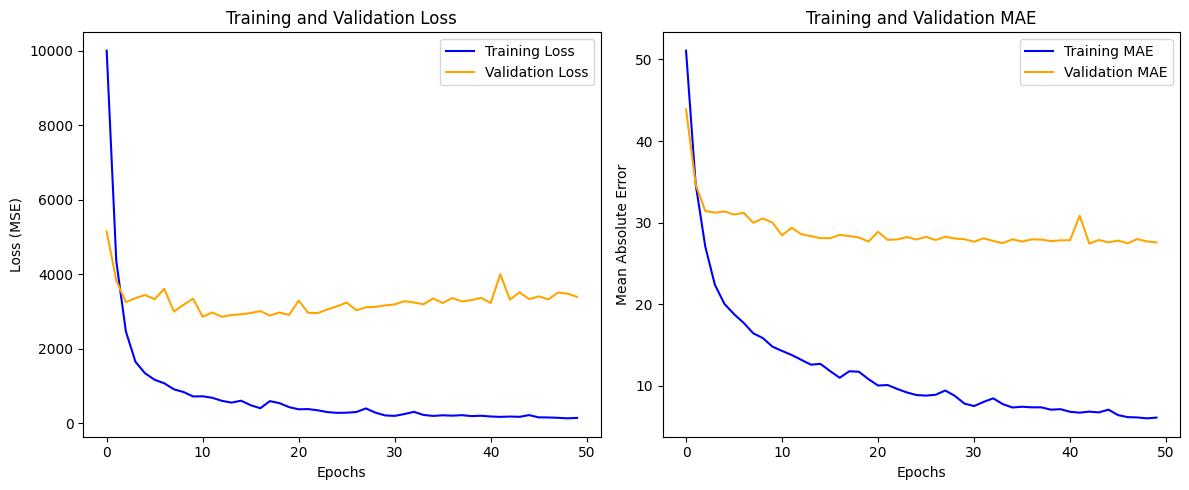

In [12]:
# Relu

history_dict = history_relu.history

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss', color='blue')
plt.plot(history_dict['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict['mean_absolute_error'], label='Training MAE', color='blue')
plt.plot(history_dict['val_mean_absolute_error'], label='Validation MAE', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()

plt.tight_layout()
plt.show()


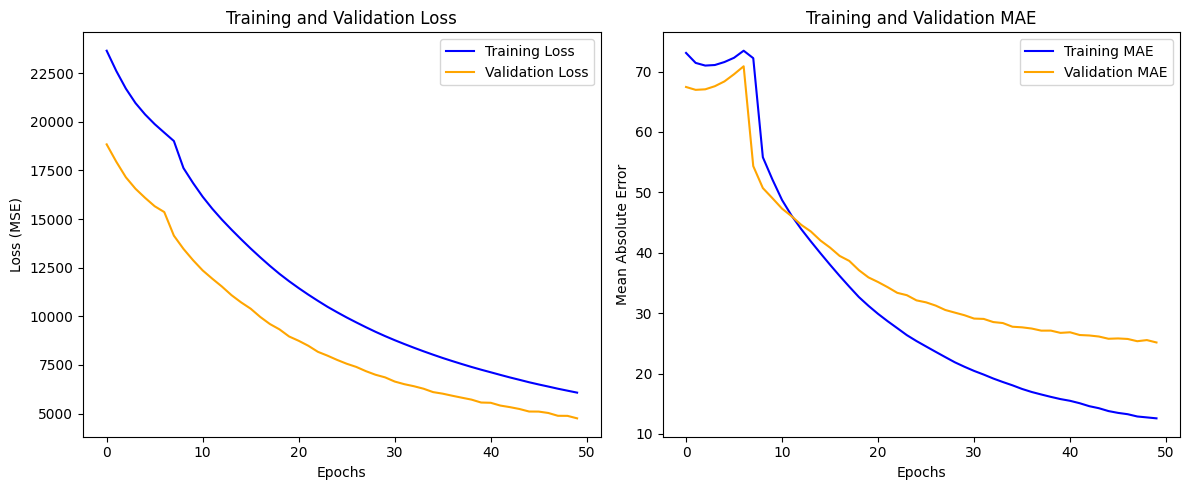

In [13]:
# Sigmoid

history_dict2 = history_sigmoid.history

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict2['loss'], label='Training Loss', color='blue')
plt.plot(history_dict2['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict2['mean_absolute_error'], label='Training MAE', color='blue')
plt.plot(history_dict2['val_mean_absolute_error'], label='Validation MAE', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()

plt.tight_layout()
plt.show()

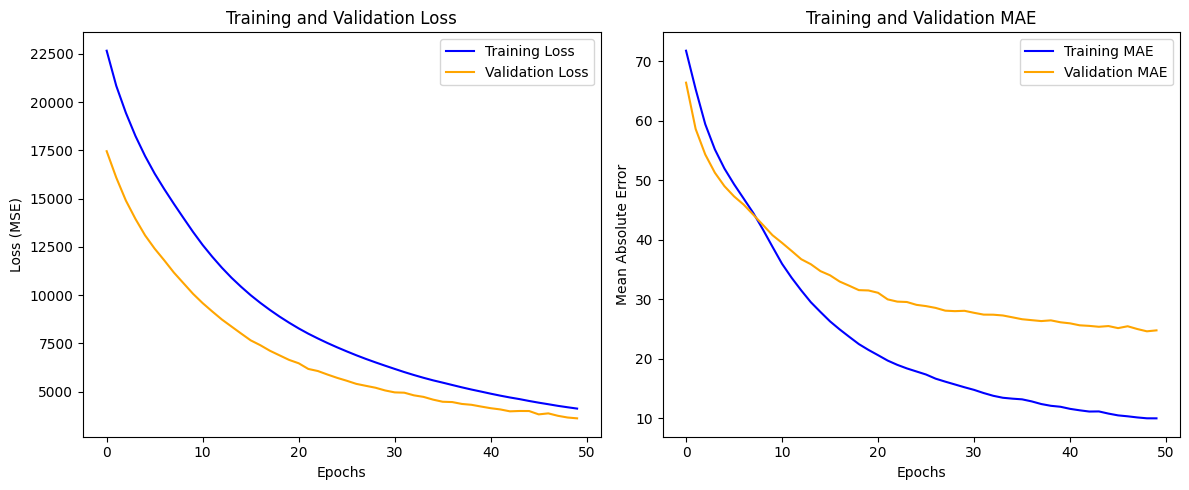

In [14]:
# Tanh

history_dict3 = history_tanh.history

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dict3['loss'], label='Training Loss', color='blue')
plt.plot(history_dict3['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dict3['mean_absolute_error'], label='Training MAE', color='blue')
plt.plot(history_dict3['val_mean_absolute_error'], label='Validation MAE', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_relu = model_relu.predict(x_test_scaled)
y_pred_sigmoid = model_sigmoid.predict(x_test_scaled)
y_pred_tanh = model_tanh.predict(x_test_scaled)

# Calcular métricas para el modelo con ReLU
mse_relu = mean_squared_error(y_test, y_pred_relu)
mae_relu = mean_absolute_error(y_test, y_pred_relu)
r2_relu = r2_score(y_test, y_pred_relu)

print("\nMétricas para el modelo con ReLU:")
print(f"Mean Squared Error (MSE): {mse_relu:.2f}")
print(f"Mean Absolute Error (MAE): {mae_relu:.2f}")
print(f"R² Score: {r2_relu * 100:.2f}%")

# Calcular métricas para el modelo con Sigmoid
mse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid)
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
r2_sigmoid = r2_score(y_test, y_pred_sigmoid)

print("\nMétricas para el modelo con Sigmoid:")
print(f"Mean Squared Error (MSE): {mse_sigmoid:.2f}")
print(f"Mean Absolute Error (MAE): {mae_sigmoid:.2f}")
print(f"R² Score: {r2_sigmoid * 100:.2f}%")

# Calcular métricas para el modelo con Tanh
mse_tanh = mean_squared_error(y_test, y_pred_tanh)
mae_tanh = mean_absolute_error(y_test, y_pred_tanh)
r2_tanh = r2_score(y_test, y_pred_tanh)

print("\nMétricas para el modelo con Sigmoid:")
print(f"Mean Squared Error (MSE): {mse_tanh:.2f}")
print(f"Mean Absolute Error (MAE): {mae_tanh:.2f}")
print(f"R² Score: {r2_tanh * 100:.2f}%")

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Métricas para el modelo con ReLU:
Mean Squared Error (MSE): 3392.14
Mean Absolute Error (MAE): 27.58
R² Score: 77.14%

Métricas para el modelo con Sigmoid:
Mean Squared Error (MSE): 4756.91
Mean Absolute Error (MAE): 25.14
R² Score: 67.94%

Métricas para el modelo con Sigmoid:
Mean Squared Error (MSE): 3618.88
Mean Absolute Error (MAE): 24.76
R² Score: 75.61%


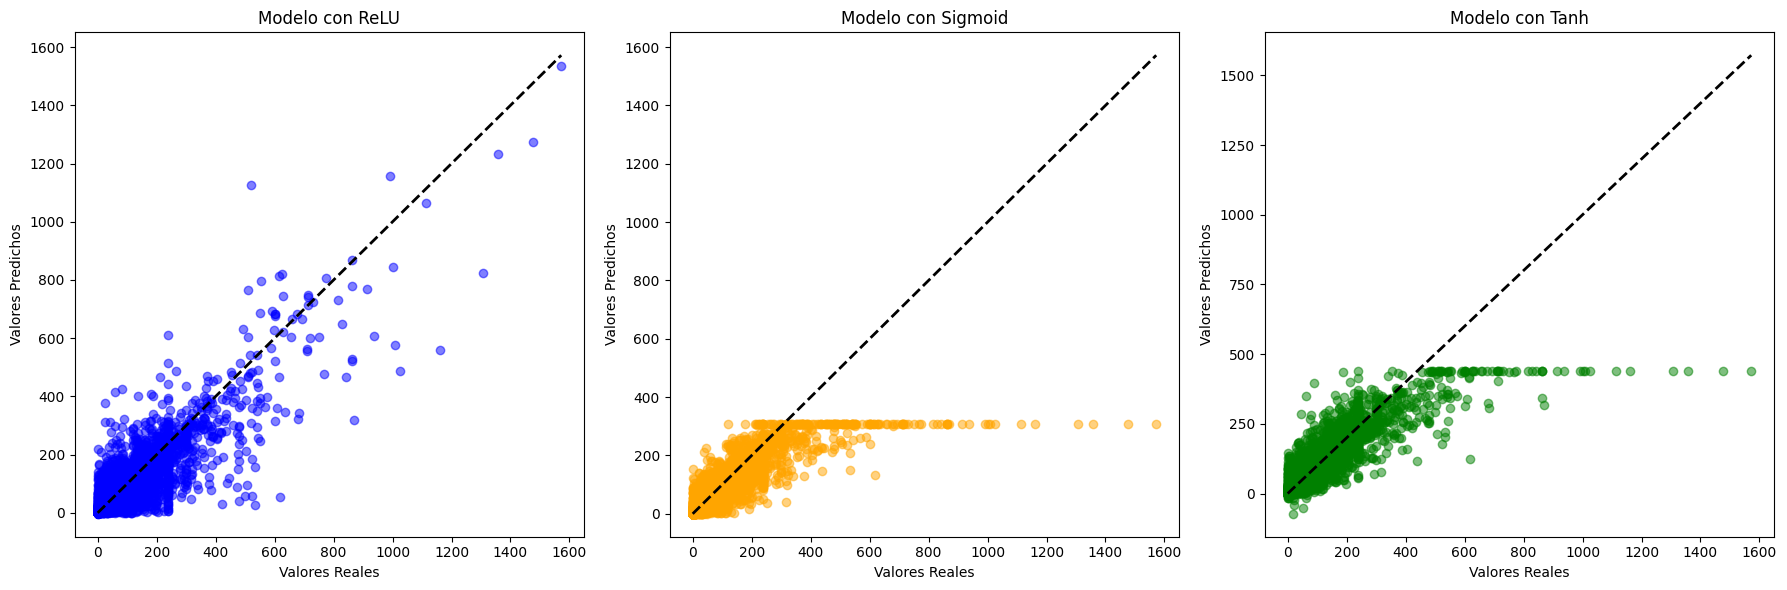

In [17]:
plt.figure(figsize=(18, 6))

# Gráfico de dispersión para el modelo con ReLU
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_relu, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Modelo con ReLU')

# Gráfico de dispersión para el modelo con Sigmoid
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_sigmoid, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Modelo con Sigmoid')

# Gráfico de dispersión para el modelo con Tanh
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_tanh, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Modelo con Tanh')

# Mostrar las figuras
plt.tight_layout()
plt.show()

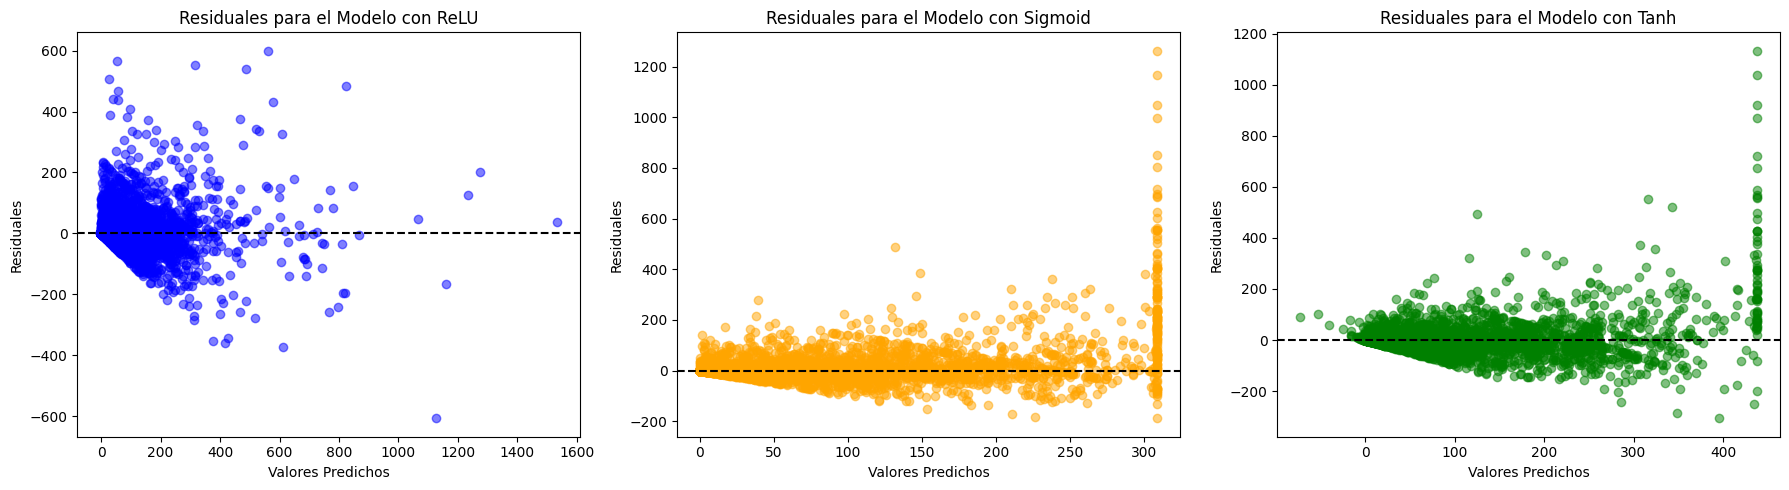

In [19]:
residuals_relu = y_test - y_pred_relu.flatten()

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_pred_relu, residuals_relu, alpha=0.5, color='blue')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Residuales para el Modelo con ReLU')

residuals_sigmoid = y_test - y_pred_sigmoid.flatten()
plt.subplot(1, 3, 2)
plt.scatter(y_pred_sigmoid, residuals_sigmoid, alpha=0.5, color='orange')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Residuales para el Modelo con Sigmoid')

residuals_tanh = y_test - y_pred_tanh.flatten()
plt.subplot(1, 3, 3)
plt.scatter(y_pred_tanh, residuals_tanh, alpha=0.5, color='green')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuales')
plt.title('Residuales para el Modelo con Tanh')

plt.tight_layout()
plt.show()



**1.1.4 Análisis de resultados**
___

### 1.2 Datos jugadores del FIFA
El dataset en la actividad incluye información sobre la performance de cada jugador en el juego FIFA. 

1. Tratamiento de los datos. Cada jugador tiene una posición determinada `team_position` y según la columna que tiene el mismo valor, tiene un puntaje. (0.5 pts)
   1. De acuerdo a ese puntaje, asignar las siguientes categorías:
      * Poor:[46.0, 62.0]
      * Interm:[63.0, 66.0]	
      * Good:[67.0, 71.0]	
      * Excel:[72.0, 94.0]   
2. Generación del modelo de clasificación, tomando en cuenta esta nueva columna a partir de las columnas (2.5 pts)
   * Considera las siguientes columnas como features: `attacking_crossing	attacking_finishing	attacking_heading_accuracy	attacking_short_passing	attacking_volleys	skill_dribbling	skill_curve	skill_fk_accuracy	skill_long_passing	skill_ball_control	movement_acceleration	movement_sprint_speed	movement_agility	movement_reactions	movement_balance	power_shot_power	power_jumping	power_stamina	power_strength	power_long_shots	mentality_aggression	mentality_interceptions	mentality_positioning	mentality_vision	mentality_penalties	mentality_composure	defending_marking	defending_standing_tackle	defending_sliding_tackle	goalkeeping_diving	goalkeeping_handling	goalkeeping_kicking	goalkeeping_positioning	goalkeeping_reflexes`. 
3. Generar el análisis y gráficas para analizar la performance del modelo. (2 pts)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_players = pd.read_csv('players_20.csv')
data_players.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [3]:
data_players['team_position'].unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES',
       'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', nan, 'RWB', 'LWB'],
      dtype=object)

**1.2.1 Tratamiento de datos**
___

In [4]:
data_players['team_position'] = data_players['team_position'].str.lower()

In [5]:
# Borramos los que tengan NA 
columnas_a_verificar = ['rw', 'lw', 'cam', 'rcm', 'lcb', 'st', 'cdm', 'ldm', 'rm',
                        'rcb', 'lcm', 'lm', 'cf', 'lb', 'ls', 'rb', 'rdm',
                        'ram', 'rs', 'rf', 'cm', 'cb', 'lf', 'lam', 'rwb', 'lwb']

data_players = data_players.dropna(subset=columnas_a_verificar)

# Nos quedamos solo con los números antes del "+"
def extract_main_score(score):
    try:
        if pd.notna(score) and '+' in str(score):
            return int(str(score).split('+')[0])
        elif pd.notna(score):
            return int(score)
    except ValueError:
        return np.nan

for columna in columnas_a_verificar:
    data_players[columna] = data_players[columna].apply(extract_main_score)

In [6]:
data_players.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68,66,66,66,68,63,52,52,52,63
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65,61,61,61,65,61,53,53,53,61
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66,61,61,61,66,61,46,46,46,61


In [7]:
data_players = data_players[data_players['team_position'].isin(columnas_a_verificar)]

def get_score_from_position(row):
    position = row['team_position']
    if position in data_players.columns and pd.notna(row[position]):
        return row[position]
    else:
        return None

data_players['score_from_position'] = data_players.apply(get_score_from_position, axis=1)

In [29]:
data_players

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,score_from_position,categoria_segun_position
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,66,66,68,63,52,52,52,63,93,Excel
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,61,61,65,61,53,53,53,61,89,Excel
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,61,61,66,61,46,46,46,61,90,Excel
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,63,63,66,61,49,49,49,61,89,Excel
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77,77,77,73,66,66,66,73,87,Excel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18148,242011,https://sofifa.com/player/242011/dean-walsh/20...,D. Walsh,Dean Walsh,22,1997-04-28,175,75,Republic of Ireland,Waterford FC,...,30,30,31,31,31,31,31,31,49,Poor
18149,243084,https://sofifa.com/player/243084/guoyuan-yang/...,Yang Guoyuan,杨国元,22,1997-04-09,175,72,China PR,Henan Jianye FC,...,46,46,45,45,47,47,47,45,48,Poor
18155,247339,https://sofifa.com/player/247339/maxime-kouogu...,M. Kouogun,Maxime Kouogun,22,1997-03-14,184,81,Cameroon,Waterford FC,...,42,42,42,45,49,49,49,45,49,Poor
18182,252584,https://sofifa.com/player/252584/joe-white/20/...,J. White,Joe White,17,2002-01-18,188,72,England,Bolton Wanderers,...,42,42,47,48,47,47,47,48,48,Poor


In [8]:
def categorize_performance(score):
    if 46 <= score <= 62:
        return 'Poor'
    elif 63 <= score <= 66:
        return 'Interm'
    elif 67 <= score <= 71:
        return 'Good'
    elif 72 <= score <= 94:
        return 'Excel'
    else:
        return 'Unknown'

# Aplicamos la función para crear la nueva columna categorizada
data_players['categoria_segun_position'] = data_players['score_from_position'].apply(categorize_performance)

# Eliminamos las filas con la categoría 'Unknown' (si existieran)
data_players = data_players[data_players['categoria_segun_position'] != 'Unknown']

In [9]:
data_players['categoria_segun_position'].value_counts()

categoria_segun_position
Good      2024
Interm    1685
Excel     1593
Poor      1290
Name: count, dtype: int64

**1.2.2 Modelo de clasificación**
___

In [10]:
features = [
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power',
    'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
    'mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
    'mentality_vision', 'mentality_penalties', 'mentality_composure',
    'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle',
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
    'goalkeeping_positioning', 'goalkeeping_reflexes'
]

x_players = data_players[features]
y_players = data_players['categoria_segun_position']

In [63]:
from tensorflow import keras

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_players)

x_train_players, x_test_players, y_train_players, y_test_players = train_test_split(x_players, y_encoded, test_size=0.2, random_state=42)

input_dim = x_players.shape[1]

model_players = keras.models.Sequential()
model_players.add(keras.layers.Input(shape=(input_dim,)))

for _ in range(10):
    model_players.add(keras.layers.Dense(100, activation='relu'))
model_players.add(keras.layers.Dense(4, activation='softmax'))

In [64]:
model_players.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [65]:
history_cat_players = model_players.fit(
    x_train_players, 
    y_train_players, 
    epochs=50, 
    batch_size=32, 
    validation_data=(x_test_players, y_test_players)
)

Epoch 1/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3430 - loss: 1.3147 - val_accuracy: 0.4261 - val_loss: 1.1083
Epoch 2/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4212 - loss: 1.1611 - val_accuracy: 0.4966 - val_loss: 1.0507
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4808 - loss: 1.0944 - val_accuracy: 0.4670 - val_loss: 1.0878
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4987 - loss: 1.0518 - val_accuracy: 0.5383 - val_loss: 0.9869
Epoch 5/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5157 - loss: 1.0123 - val_accuracy: 0.5466 - val_loss: 0.9772
Epoch 6/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5222 - loss: 1.0142 - val_accuracy: 0.5148 - val_loss: 0.9977
Epoch 7/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5505 - loss: 0.9955 - val_accuracy: 0.4428 - val_loss: 1.1058
Epoch 8/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5273 - loss: 0.9964 - val_accuracy: 0.

In [66]:
model_players.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_686 (Dense)               │ (None, 100)            │         3,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_687 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_688 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_689 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_690 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_691 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_692 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_693 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_694 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_695 (Dense)               │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_696 (Dense)               │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 284,414 (1.08 MB)

 Trainable params: 94,804 (370.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 189,610 (740.67 KB)

In [67]:
from sklearn.metrics import classification_report

y_pred = model_players.predict(x_test_players)
y_pred_classes = y_pred.argmax(axis=1)

report = classification_report(y_test_players, y_pred_classes, target_names=label_encoder.classes_)
print(report)

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

       Excel       0.98      0.80      0.88       338
        Good       0.74      0.96      0.83       401
      Interm       0.81      0.76      0.78       327
        Poor       0.95      0.81      0.88       253

    accuracy                           0.84      1319
   macro avg       0.87      0.83      0.84      1319
weighted avg       0.86      0.84      0.84      1319



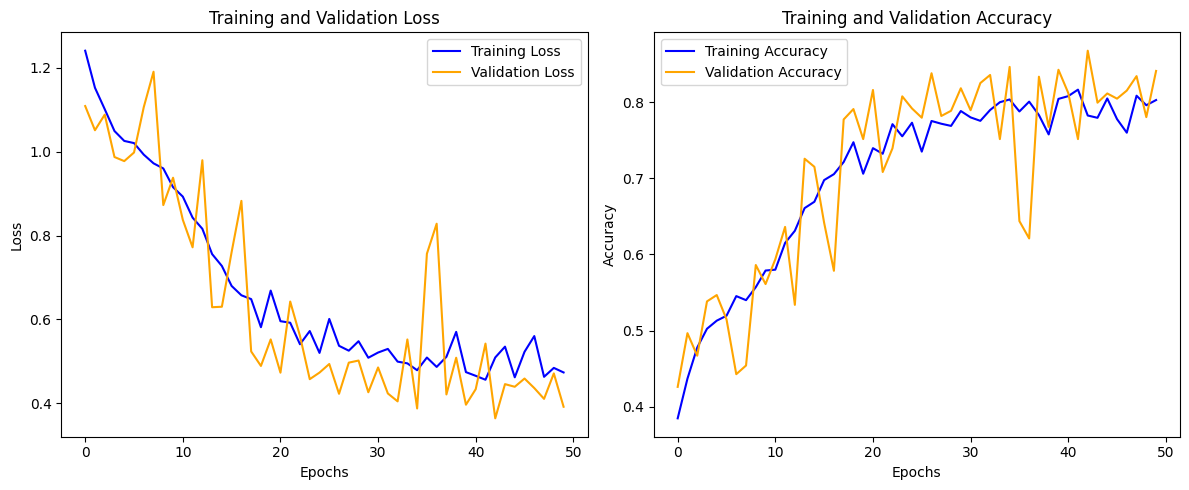

In [68]:
history_players = history_cat_players.history

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_players['loss'], label='Training Loss', color='blue')
plt.plot(history_players['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_players['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_players['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


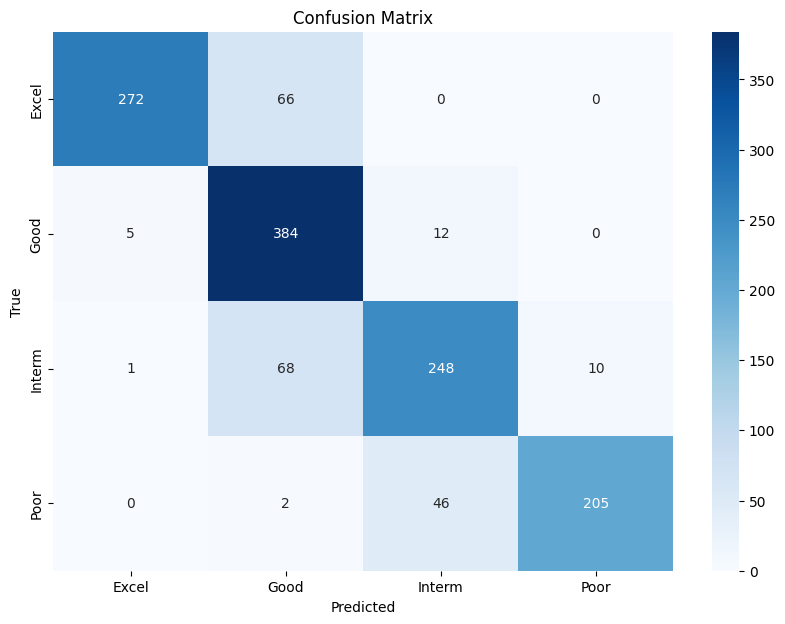

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_players, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**1.2.3 Análisis de graficos de la performance del modelo**
___

**1.2.4 Análisis de resultados**
___

## Parte 2: Índice latinoamericano de IA
Revisar el índide Latinoamericano de Inteligencia Artificial https://indicelatam.cl/. También disponible en PDF en el blackboard.
Responder a las siguientes preguntas:

1. ¿Cuál es el objetivo principal del Índice Latinoamericano de IA y cómo se mide el progreso en la región? **(0.5 pts)**


> El ILIA tiene como objetivo ayudar a que la Inteligencia Artificial se desarrolle de manera más inclusiva en América Latina. Busca aprovechar las oportunidades, identificar las diferencias que aún existen, y ayudar a impulsar acciones concretas para que la IA avance de manera beneficiosa para todos en la región. Para medir cómo vamos, el índice usa más de 70 indicadores, organizados en dimensiones como Factores Habilitantes, Investigación, Desarrollo y Gobernanza. 

2. ¿Qué países de Latinoamérica lideran actualmente el ranking del Índice Latinoamericano de IA y por qué? **(0.5 pts)**

> En el ILIA 2024, los países que están liderando el camino son Chile, Brasil y Uruguay. Lo que los hace destacar es su trabajo en diferentes áreas clave, como tener una buena infraestructura tecnológica, fomentar el talento especializado, promover la ciencia y la innovación. Estos países se encuentran en lo que se llama el "Cuadrante I", lo que básicamente significa que tienen un entorno bastante favorable para el desarrollo de la IA y, por eso, están bien posicionados para ser líderes regionales.

3. ¿Cuáles son los principales desafíos que enfrenta la región para avanzar en la adopción y desarrollo de la Inteligencia Artificial? **(0.5 pts)**

> Algunos de los grandes problemas que enfrenta la región para desarrollar la IA incluyen la falta de talento especializado y la dificultad para retener a los expertos que se forman, ya que muchos terminan yéndose a otros países. Además, falta infraestructura adecuada, como computadoras de alto rendimiento y acceso a redes rápidas. También hay una gran brecha de género, lo que significa que las mujeres aún están subrepresentadas tanto en los estudios como en el uso de la IA.

4. ¿De qué manera el Índice Latinoamericano de IA considera la ética y la responsabilidad social en el desarrollo de la IA? **(0.5 pts)**

> El índice también se preocupa por el aspecto ético y la responsabilidad social en el desarrollo de la IA. Evalúa qué tan bien los países están integrando estrategias de IA que respeten estos valores, incluyendo marcos regulatorios para asegurarse de que todo se haga de manera responsable. Por ejemplo, menciona la Metodología RAM de la UNESCO, que sirve como una guía para lograr una IA más ética. Además, hay iniciativas conjuntas con universidades para crear algoritmos más transparentes y justos.

5. ¿Qué iniciativas gubernamentales y privadas están impulsando el desarrollo de la IA en Latinoamérica y cómo se reflejan en el Índice Latinoamericano de IA? **(0.5 pts)**

> En América Latina, hay iniciativas tanto del gobierno como del sector privado para apoyar el desarrollo de la IA. Algunos ejemplos incluyen la inversión en infraestructura tecnológica con apoyo de la CAF y la creación del Grupo de Trabajo por la Ética de la IA, que nació durante la Cumbre de Santiago. También hay programas del BID que buscan ayudar a que más empresas adopten la IA. A nivel privado, grandes empresas como Google, Microsoft y AWS están poniendo su grano de arena para que el desarrollo de la IA en la región sea más equilibrado y responsable.

6. De acuerdo al índice latinoamericano de IA ¿Cuál es el potencial del desarrollo de la inteligencia artificial en el Perú? **(0.5 pts)**

> Perú tiene un gran potencial, pero enfrenta algunos desafíos importantes. En el índice, Perú está en el "Cuadrante III" en lo que respecta a infraestructura y desarrollo de la IA, lo que significa que hay mucho por mejorar. Sin embargo, en el aspecto de gobernanza, está un poco mejor, en el "Cuadrante II", lo que indica que hay un buen ambiente regulatorio. Si Perú logra mejorar en las áreas donde hay más problemas, podría aprovechar mucho mejor las oportunidades que trae la IA.

7. ¿Qué iniciativas puede tomar en el Perú para ascender en el índice latinoamericano? **(1 pts)**

> Para que Perú pueda avanzar en el Índice Latinoamericano de Inteligencia Artificial, lo primero es ponerle atención a la infraestructura tecnológica: mejorar la conectividad, apostar por el 5G y contar con mejor capacidad de computación. Sin esto, no se puede competir. Además, hay que trabajar en formar y retener talento especializado. No basta con educar, también hay que hacer atractivo quedarse en el país. Es clave tener acceso a datos de calidad, y para eso se necesita infraestructura que los respalde y políticas que aseguren su uso responsable. También necesitamos marcos regulatorios que promuevan la IA de forma ética, apoyando tanto la inversión pública como la privada.

## Parte 3: Historia de la Inteligencia Artificial

**Objetivo:** Extraer 4 oraciones clave y 3 ideas (del grupo) sobre el capítulo.

1. Capítulo 1
   1. **"Turing was, for all practical purposes, the inventor of the computer, and shortly after that, he largely invented the field of AI."**
   - "Turing fue, a todos los efectos prácticos, el inventor de la computadora, y poco después de eso, inventó en gran medida el campo de la IA"
   2. **"And if all mathematical decision problems can be solved by following a recipe, then for any decision problem, you should be able to design a Turing machine to solve it."**
   - "Y si todos los problemas de decisión matemática se pueden resolver siguiendo una receta, entonces para cualquier problema de decisión, debería ser posible diseñar una máquina de Turing para resolverlo"
   3. **"The question of whether AI is possible ultimately amounts to whether we can produce intelligent behavior simply by following lists of instructions like these."**
   - La cuestión de si la IA es posible, en última instancia, se reduce a si podemos producir un comportamiento inteligente simplemente siguiendo listas de instrucciones como estas"
   4. **"Although computers are just machines for following instructions, this does not mean that they are incapable of making decisions."**
   - "Aunque las computadoras son simplemente máquinas para seguir instrucciones, esto no significa que sean incapaces de tomar decisiones".

1. Capítulo 2
   1. **"The next two decades were the first boom in AI. There was a flush of optimism, growth, and apparent progress, leading to the era called the golden age of AI, from about 1956 to 1974."**
   - "Las siguientes dos décadas fueron el primer auge de la IA. Hubo un auge de optimismo, crecimiento y aparente progreso, que condujo a la era llamada la edad de oro de la IA, desde aproximadamente 1956 hasta 1974."
   2. **"Instead of starting out trying to build a complete general intelligent system, the approach adopted was to identify the various different individual capabilities that seemed to be required for general-purpose AI and to build systems that could demonstrate these capabilities."**
   - "En lugar de comenzar a intentar construir un sistema inteligente general completo, el enfoque adoptado fue identificar las distintas capacidades individuales que parecían necesarias para una IA de propósito general y construir sistemas que pudieran demostrar esas capacidades."
   3. **"There was a good deal of naivety in the golden age, with researchers making reckless and grandiose predictions about the likely speed of progress in the field, which have haunted AI ever since."**
   - "Hubo mucha ingenuidad en la edad de oro, con investigadores haciendo predicciones imprudentes y grandiosas sobre la posible velocidad de progreso en el campo, lo que ha perseguido a la IA desde entonces."
   4. **"The decade from the early 1970s to the early 1980s later became known as the AI winter, although it should perhaps better be known as the first AI winter, because there were more to come"**
   - "La década que va desde principios de los años 1970 hasta principios de los años 1980 se conoció más tarde como el invierno de la IA, aunque tal vez debería llamarse mejor el primer invierno de la IA, porque aún quedaban más por venir."

1. Capítulo 6
   1. **" In the second decade of the twenty-first century, AI has attracted more interest than any new technology since the World Wide Web in the 1990s."**
   - "En la segunda década del siglo XXI, la IA ha atraído más interés que cualquier otra tecnología nueva desde la aparición de la World Wide Web en los años 90."
   2. **" Everywhere that technology is used, AI is finding applications: in education, science, industry, commerce, agriculture, health care, entertainment, the media and arts, and beyond."**
   - "En todos los lugares donde se utiliza la tecnología, la IA está encontrando aplicaciones: en la educación, la ciencia, la industria, el comercio, la agricultura, la atención sanitaria, el entretenimiento, los medios de comunicación y las artes, y más allá."
   3. **"One important new opportunity for AI-powered health care is what we might call personal health care management."**
   - "Una nueva e importante oportunidad para la atención sanitaria basada en inteligencia artificial es lo que podríamos llamar la gestión de la atención sanitaria personal."
   4. **"If you could find a way for a car to know precisely where it was and what was around it, then you would have solved the problem of driverless cars. The solution to this problem was to be modern machine learning techniques: without them, driverless cars would not be possible"**
   - "Si se pudiera encontrar una manera de que un coche supiera exactamente dónde se encuentra y qué hay a su alrededor, se habría solucionado el problema de los coches sin conductor. La solución a este problema eran las técnicas modernas de aprendizaje automático: sin ellas, los coches sin conductor no serían posibles."

1. Ideas (del grupo)
   1. Alan Turing, con su tería de las máquinas que siguen instrucciones (Máquinas de Turing), creó las bases de las computadoras actuales y de la IA. Los medios introducieron el término "cerebros electrónicos" para describir los primeros ordenadores, lo que dio la impresión errónea de que estas máquinas poseían algún tipo de inteligencia superior. Sin embargo, los ordenadores no eran inteligentes; solo seguían instrucciones, llamadas algoritmos.
   2. En la época dorada de la inteligencia artifial se realizaron muchos avances y se tenia muchas espectativas muy poco realistas de lo que sería capaz de realizar esta tecnologia en el contexto de la época. Sin embargo, pronto se encotraron con barreras debido a las limitaciones tecnologias y debido a criticas fue perdiendo la inversión con la que contaba inicialmente.
   3. El deep learning ha permitido que la inteligencia artificial encuentre aplicaciones en casi todos los aspectos de la vida, desde la medicina hasta la creación de imágenes y la conducción autónoma.